In [1]:
import numpy as np
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter
from AMAT.visibility import LanderToPlanet, LanderToOrbiter, OrbiterToPlanet

## DTE Communication from Titan: Earth Visibility 

In [15]:
visibility = LanderToPlanet(observer_planet="TITAN", 
                            target_planet="EARTH", 
                            latitude=3.0, 
                            date="2034-03-28 00:00:00")

In [16]:
import matplotlib.pyplot as plt

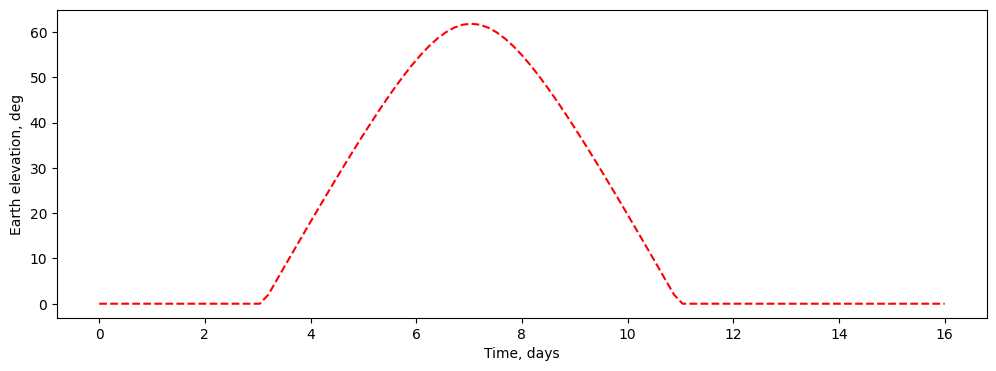

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.elevation_array, 'r--')
plt.xlabel("Time, days")
plt.ylabel("Earth elevation, deg")
plt.show()

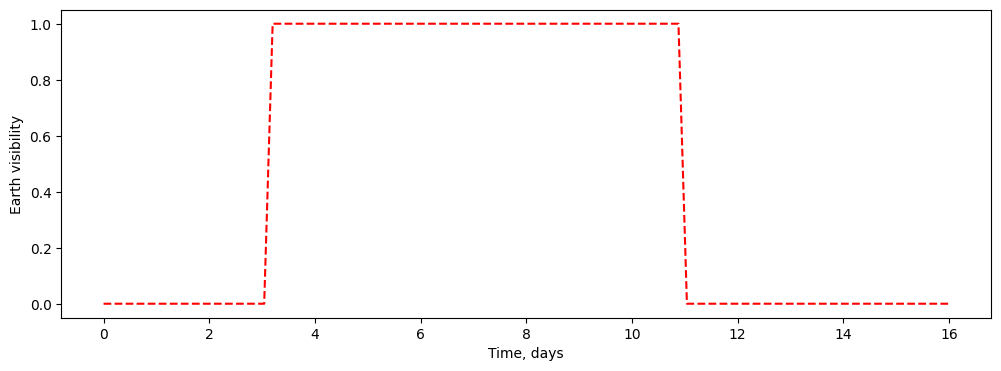

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.visible_array, 'r--')
plt.xlabel("Time, days")
plt.ylabel("Earth visibility")
plt.show()

## Lander Visibility to Relay Orbiter at Titan

In [19]:
approach = Approach("TITAN", v_inf_vec_icrf_kms=np.array([-0.910, 5.081, 4.710]), rp=(2575+1500)*1e3, psi=3*np.pi/2)
orbiter = PropulsiveOrbiter(approach=approach, apoapsis_alt_km=15000)
visibility = LanderToOrbiter(planet="TITAN", latitude=3.00, orbiter=orbiter, t_seconds=86400*16, num_points=2001)

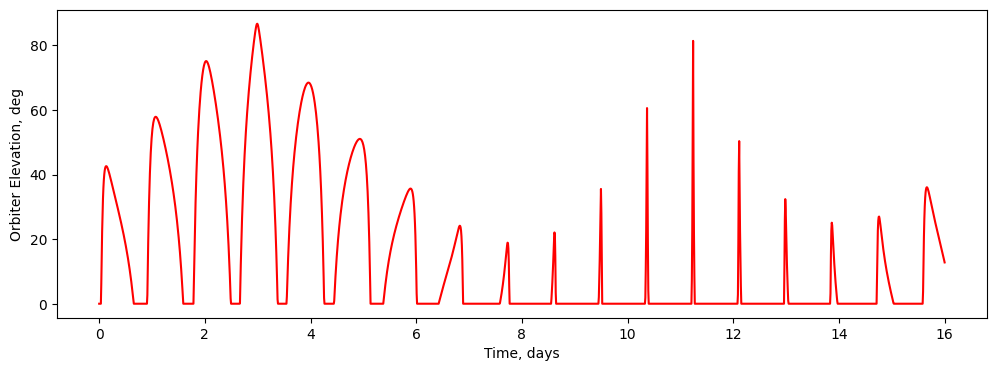

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.elevation_array, 'r-')
plt.xlabel("Time, days")
plt.ylabel("Orbiter Elevation, deg")
plt.show()

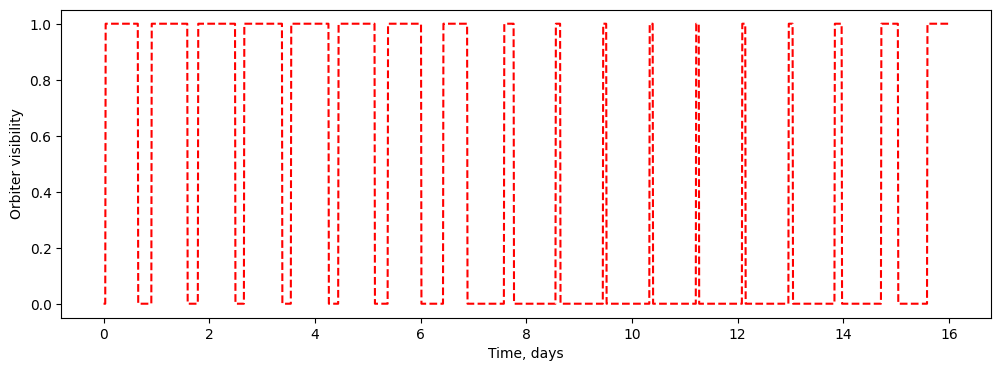

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.visible_array, 'r--')
plt.xlabel("Time, days")
plt.ylabel("Orbiter visibility")
plt.show()

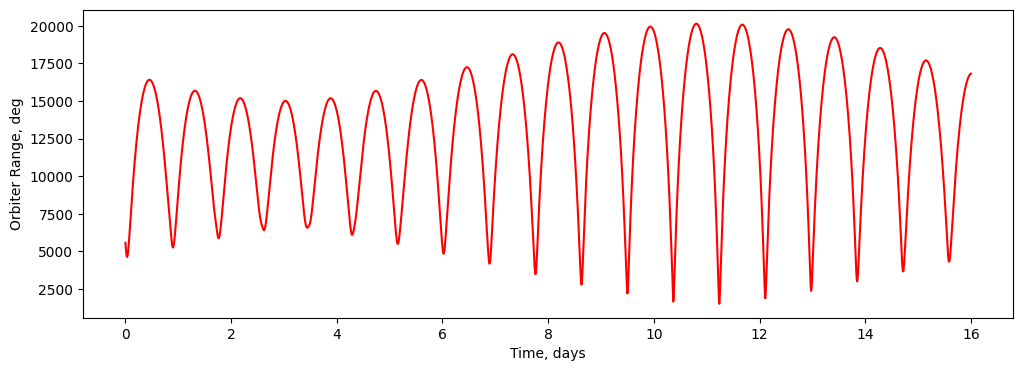

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.range_array/1e3, 'r-')
plt.xlabel("Time, days")
plt.ylabel("Orbiter Range, deg")
plt.show()

## Orbiter to Earth Visibility

In [23]:
approach = Approach("TITAN", v_inf_vec_icrf_kms=np.array([-0.910, 5.081, 4.710]), rp=(2575+1500)*1e3, psi=3*np.pi/2)
orbiter = PropulsiveOrbiter(approach=approach, apoapsis_alt_km=15000)
visibility = OrbiterToPlanet(target_planet="EARTH", observer_planet="TITAN",
                             orbiter=orbiter, date="2034-03-28 00:00:00", t_seconds=86400*16, num_points=2001)

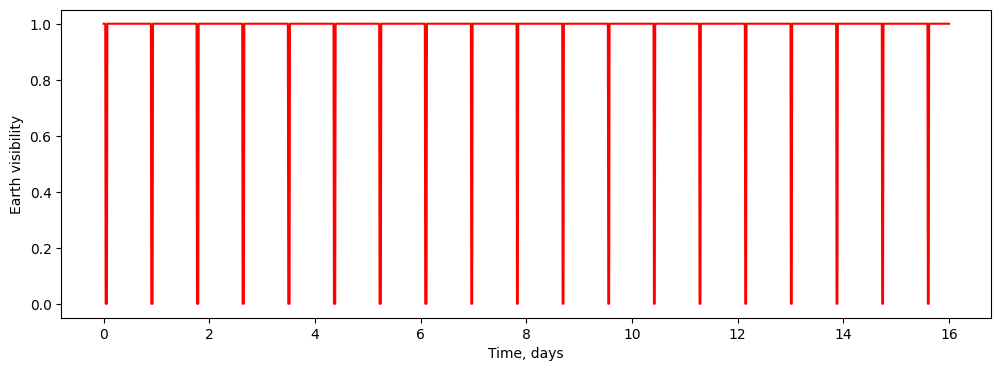

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(visibility.t_array/86400, visibility.visible_array, 'r-')
plt.xlabel("Time, days")
plt.ylabel("Earth visibility")
plt.show()